In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.models as models
from torch.utils.data import DataLoader

import random
import os
import copy

import torch

import sys
sys.path.append("../../")

from src.model.TransferModel import run_style_transfer
from src.dataset.dataset import ImgDataset
from src.utils.other import *

In [5]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

cnn = models.vgg19(pretrained=True).features.to(device).eval()

cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

## lucian high noon and second to last one

In [6]:
outfolder = "../../results/weighted/traditional_style_images_256/"
os.system("mkdir -p " + str(outfolder))

0

In [7]:
style_dataset = ImgDataset("../../data/traditional_style_images/", imsize, device)
style_loader = DataLoader(style_dataset, batch_size=1, shuffle=False)

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1434.199341 Content Loss: 29.859371

run [100]:
Style Loss : 215.117798 Content Loss: 31.246943

run [150]:
Style Loss : 86.656654 Content Loss: 31.740265

run [200]:
Style Loss : 39.398563 Content Loss: 32.009438

run [250]:
Style Loss : 22.642862 Content Loss: 31.530783

run [300]:
Style Loss : 14.734157 Content Loss: 30.935204



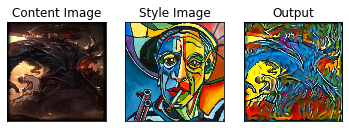

In [9]:
style_weight = 1000000
content_weight = 1

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break

# squeeze batch dim
style_img = style_img.squeeze(0)
# input
input_img = content_img.clone()
# run style transfer
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output, axes[2], "Output")
plt.savefig(outfolder + "high_noon_lucian_style_" + str(style_weight) + "_content_" + str(content_weight))
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1496.060547 Content Loss: 2089.448242

run [100]:
Style Loss : 379.048157 Content Loss: 1827.309082

run [150]:
Style Loss : 294.278717 Content Loss: 1731.956543

run [200]:
Style Loss : 278.419861 Content Loss: 1770.462036

run [250]:
Style Loss : 298.695374 Content Loss: 1742.409546

run [300]:
Style Loss : 300.608276 Content Loss: 1782.607422



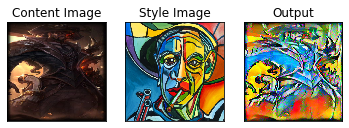

In [11]:
style_weight = 1000000
content_weight = 100

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break

# squeeze batch dim
style_img = style_img.squeeze(0)
# input
input_img = content_img.clone()
# run style transfer
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output, axes[2], "Output")
plt.savefig(outfolder + "high_noon_lucian_style_" + str(style_weight) + "_content_" + str(content_weight))
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1457.621582 Content Loss: 286.887146

run [100]:
Style Loss : 211.993103 Content Loss: 274.996124

run [150]:
Style Loss : 82.453011 Content Loss: 261.378571

run [200]:
Style Loss : 44.023163 Content Loss: 248.491150

run [250]:
Style Loss : 31.787786 Content Loss: 239.946564

run [300]:
Style Loss : 24.805904 Content Loss: 233.779297



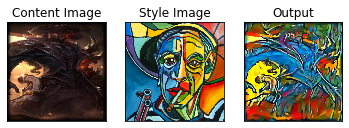

In [12]:
style_weight = 1000000
content_weight = 10

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break

# squeeze batch dim
style_img = style_img.squeeze(0)
# input
input_img = content_img.clone()
# run style transfer
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output, axes[2], "Output")
plt.savefig(outfolder + "high_noon_lucian_style_" + str(style_weight) + "_content_" + str(content_weight))
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 1467.797119 Content Loss: 1227.857056

run [100]:
Style Loss : 261.767456 Content Loss: 1069.382690

run [150]:
Style Loss : 151.881607 Content Loss: 1003.539551

run [200]:
Style Loss : 119.802208 Content Loss: 971.666626

run [250]:
Style Loss : 117.788765 Content Loss: 959.065796

run [300]:
Style Loss : 112.850662 Content Loss: 954.350159



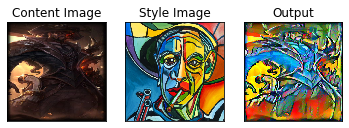

In [16]:
style_weight = 1000000
content_weight = 50

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break

# squeeze batch dim
style_img = style_img.squeeze(0)
# input
input_img = content_img.clone()
# run style transfer
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output, axes[2], "Output")
plt.savefig(outfolder + "high_noon_lucian_style_" + str(style_weight) + "_content_" + str(content_weight))
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 138.686234 Content Loss: 28.439297

run [100]:
Style Loss : 20.450020 Content Loss: 27.869122

run [150]:
Style Loss : 8.704443 Content Loss: 26.232258

run [200]:
Style Loss : 4.548400 Content Loss: 24.980433

run [250]:
Style Loss : 3.196467 Content Loss: 24.009268

run [300]:
Style Loss : 2.631758 Content Loss: 23.612013



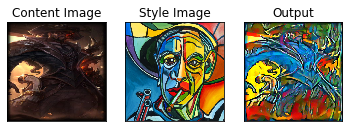

In [13]:
style_weight = 100000
content_weight = 1

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break

# squeeze batch dim
style_img = style_img.squeeze(0)
# input
input_img = content_img.clone()
# run style transfer
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output, axes[2], "Output")
plt.savefig(outfolder + "high_noon_lucian_style_" + str(style_weight) + "_content_" + str(content_weight))
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 2035.431030 Content Loss: 29.823856

run [100]:
Style Loss : 300.072388 Content Loss: 31.364019

run [150]:
Style Loss : 120.076538 Content Loss: 32.248947

run [200]:
Style Loss : 53.995537 Content Loss: 32.592339

run [250]:
Style Loss : 31.039948 Content Loss: 32.375977

run [300]:
Style Loss : 20.742540 Content Loss: 32.011566



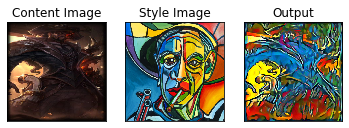

In [14]:
style_weight = 1500000
content_weight = 1

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break

# squeeze batch dim
style_img = style_img.squeeze(0)
# input
input_img = content_img.clone()
# run style transfer
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output, axes[2], "Output")
plt.savefig(outfolder + "high_noon_lucian_style_" + str(style_weight) + "_content_" + str(content_weight))
plt.show()

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 2838.256836 Content Loss: 30.012688

run [100]:
Style Loss : 410.704865 Content Loss: 31.486315

run [150]:
Style Loss : 165.997040 Content Loss: 32.297836

run [200]:
Style Loss : 75.372734 Content Loss: 32.822556

run [250]:
Style Loss : 42.327820 Content Loss: 32.792908

run [300]:
Style Loss : 30.127754 Content Loss: 32.641182



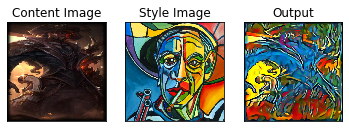

In [15]:
style_weight = 2000000
content_weight = 1

content_img = style_dataset.load_image("../../data/lucian-high-noon-300x545.jpg", device)
for i, style_img in enumerate(style_loader):
    if i == 6:
        break

# squeeze batch dim
style_img = style_img.squeeze(0)
# input
input_img = content_img.clone()
# run style transfer
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=300,
                            style_weight=style_weight, content_weight=content_weight,
                            do_print=True, device=device)

fig, axes = plt.subplots(1, 3)
for i in range(3):
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
imshow(content_img, axes[0], "Content Image")
imshow(style_img, axes[1], "Style Image")
imshow(output, axes[2], "Output")
plt.savefig(outfolder + "high_noon_lucian_style_" + str(style_weight) + "_content_" + str(content_weight))
plt.show()